拟合的多项式公式:
       2
10.14 x - 43.74 x + 47.89


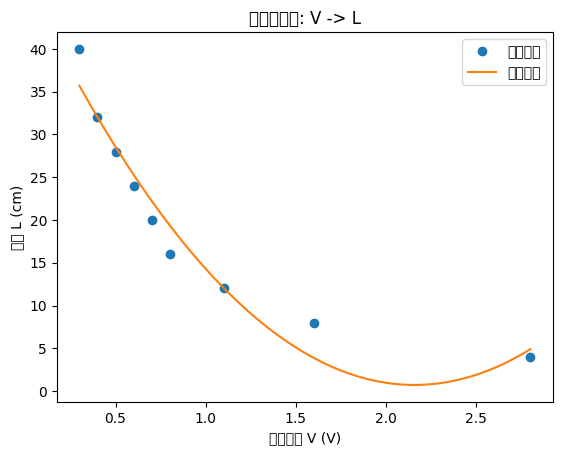

当 V = 2.0 V 时，L ≈ 0.96 cm
当 V = 1.0 V 时，L ≈ 14.29 cm
当 V = 0.5 V 时，L ≈ 28.56 cm


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 数据点
L = np.array([4, 8, 12, 16, 20, 24, 28, 32, 40])  # 距离 (cm)
V = np.array([2.8, 1.6, 1.1, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3])  # 输出电压 (V)

# 使用 numpy.polyfit 进行多项式拟合
degree = 2  # 选择三次多项式
coefficients = np.polyfit(V, L, degree)  # 拟合 V -> L
polynomial = np.poly1d(coefficients)  # 创建多项式函数

# 打印拟合的多项式
print("拟合的多项式公式:")
print(polynomial)

# 绘制原始数据和拟合曲线
V_fit = np.linspace(0.3, 2.8, 100)  # 在电压范围内生成平滑曲线
L_fit = polynomial(V_fit)  # 使用拟合多项式计算对应的 L

plt.figure()
plt.plot(V, L, 'o', label='原始数据')  # 原始数据点
plt.plot(V_fit, L_fit, '-', label='拟合曲线')  # 拟合曲线
plt.xlabel('输出电压 V (V)')
plt.ylabel('距离 L (cm)')
plt.legend()
plt.title('多项式拟合: V -> L')
plt.show()

# 测试拟合结果
test_V = [2.0, 1.0, 0.5]  # 输入测试电压
for v in test_V:
    print(f"当 V = {v} V 时，L ≈ {polynomial(v):.2f} cm")

拟合的对数模型公式: L(V) = -16.2914 * ln(V) + 16.2646


/media/jazz/TkPad_Axu/ai_app/.conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/media/jazz/TkPad_Axu/ai_app/.conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31163 (\N{CJK UNIFIED IDEOGRAPH-79BB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/media/jazz/TkPad_Axu/ai_app/.conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/media/jazz/TkPad_Axu/ai_app/.conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/media/jazz/TkPad_Axu/ai_app/.conda/lib/python3.10/site-packages/IPython/cor

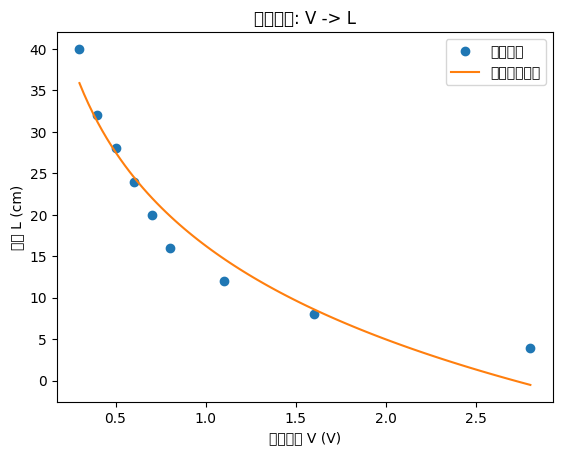

当 V = 2.0 V 时，L ≈ 4.97 cm
当 V = 1.0 V 时，L ≈ 16.26 cm
当 V = 0.5 V 时，L ≈ 27.56 cm


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 数据点
L = np.array([4, 8, 12, 16, 20, 24, 28, 32, 40])  # 距离 (cm)
V = np.array([2.8, 1.6, 1.1, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3])  # 输出电压 (V)

# 定义对数模型函数
def log_model(V, a, b):
    return a * np.log(V) + b

# 使用 curve_fit 进行对数拟合
popt, pcov = curve_fit(log_model, V, L)
a, b = popt  # 提取拟合参数

# 打印拟合参数
print(f"拟合的对数模型公式: L(V) = {a:.4f} * ln(V) + {b:.4f}")

# 绘制原始数据和拟合曲线
V_fit = np.linspace(0.3, 2.8, 100)  # 在电压范围内生成平滑曲线
L_fit = log_model(V_fit, *popt)  # 使用拟合模型计算对应的 L

plt.figure()
plt.plot(V, L, 'o', label='原始数据')  # 原始数据点
plt.plot(V_fit, L_fit, '-', label='对数拟合曲线')  # 拟合曲线
plt.xlabel('输出电压 V (V)')
plt.ylabel('距离 L (cm)')
plt.legend()
plt.title('对数拟合: V -> L')
plt.show()

# 测试拟合结果
test_V = [2.0, 1.0, 0.5]  # 输入测试电压
for v in test_V:
    print(f"当 V = {v} V 时，L ≈ {log_model(v, *popt):.2f} cm")

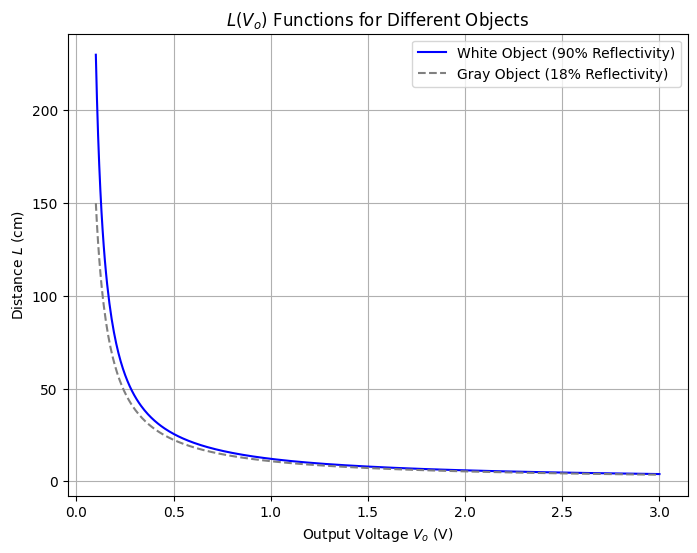

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 L(Vo) 函数
def L_white(Vo):
    return 11.5 / (Vo - 0.05)

def L_gray(Vo):
    return 10.5 / (Vo - 0.03)

# 输入电压范围 (V)
Vo_range = np.linspace(0.1, 3.0, 500)  # 避免 Vo <= 0.05 或 Vo <= 0.03

# 计算对应的距离 L
L_white_values = L_white(Vo_range)
L_gray_values = L_gray(Vo_range)

# 绘制曲线
plt.figure(figsize=(8, 6))
plt.plot(Vo_range, L_white_values, label="White Object (90% Reflectivity)", color="blue")
plt.plot(Vo_range, L_gray_values, label="Gray Object (18% Reflectivity)", color="gray", linestyle="--")

# 添加图例和标签
plt.xlabel('Output Voltage $V_o$ (V)')
plt.ylabel('Distance $L$ (cm)')
plt.title('$L(V_o)$ Functions for Different Objects')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

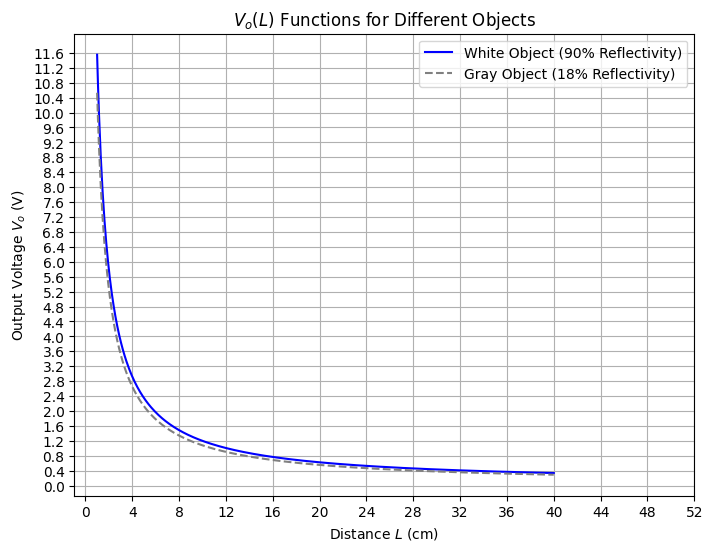

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Vo(L) 函数
def Vo_white(L):
    return 11.5 / L + 0.05

def Vo_gray(L):
    return 10.5 / L + 0.03

# 距离 L 的范围
L_range = np.linspace(1, 40, 500)  # 从 1 cm 到 50 cm，生成 500 个点

# 计算对应的输出电压 Vo
Vo_white_values = Vo_white(L_range)
Vo_gray_values = Vo_gray(L_range)

# 绘制曲线
plt.figure(figsize=(8, 6))
plt.plot(L_range, Vo_white_values, label="White Object (90% Reflectivity)", color="blue")
plt.plot(L_range, Vo_gray_values, label="Gray Object (18% Reflectivity)", color="gray", linestyle="--")

# 设置纵轴和横轴分割
V_max = max(max(Vo_white_values), max(Vo_gray_values))  # 最大值
V_ticks = np.arange(0, V_max + 0.4, 0.4)  # 纵轴每隔 0.4 分割
L_ticks = np.arange(0, 50 + 4, 4)  # 横轴每隔 4 cm 分割

plt.yticks(V_ticks)
plt.xticks(L_ticks)

# 添加图例和标签
plt.xlabel('Distance $L$ (cm)')
plt.ylabel('Output Voltage $V_o$ (V)')
plt.title('$V_o(L)$ Functions for Different Objects')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()